####  ***Import Libraries***

In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

# for ignore warning msg
warnings.simplefilter(action="ignore",category=FutureWarning)
# Display all data by rows and column
pd.set_option("display.max_columns",None,"display.max_rows",None)


#### ***Read bank marketing CSV  dataset file***

In [565]:
bankmktdf = pd.read_csv(r'C:\Users\dhira\Desktop\BankMarketing_DataSet_EDA\bank_marketing_updated.csv')
bankmktdf.head()

C:\Users\dhira\AppData\Local\Temp\ipykernel_26856\665609105.py:1: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  bankmktdf = pd.read_csv(r'C:\Users\dhira\Desktop\BankMarketing_DataSet_EDA\bank_marketing_updated.csv')


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


#### ***Data Preprocessing***

In [566]:
# As we can observe acctual data started from 3 rows, need to relaod data, and ignored first two rows, use skip command for this

bank_mkt_df = pd.read_csv(r'C:\Users\dhira\Desktop\BankMarketing_DataSet_EDA\bank_marketing_updated.csv',skiprows=2)
bank_mkt_df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### ***Convert Column name in proper case*** 

    - https://pandas.pydata.org/pandas-docs/version/1.1/user_guide/style.html

In [567]:
# bank_mkt_df.columns = bank_mkt_df.columns.str.upper() #  for upper case
# bank_mkt_df.columns = bank_mkt_df.columns.str.lower() #  for lower case

bank_mkt_df.columns = bank_mkt_df.columns.str.title()  # for Proper case use title

print(list(bank_mkt_df.columns))  # print all column in list

['Customerid', 'Age', 'Salary', 'Balance', 'Marital', 'Jobedu', 'Targeted', 'Default', 'Housing', 'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays', 'Previous', 'Poutcome', 'Response']


##### ***Highlight NaN Value in Marketing DataFrame***

In [568]:
# Highlight NaN Value in Marketing DataFrame
bank_mkt_df.style.highlight_null(null_color='red')
bank_mkt_df.head()  # print top 5 

,Customerid,Age,Salary,Balance,Marital,Jobedu,Targeted,Default,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [569]:
# Print bottom 5 
bank_mkt_df.tail()

,Customerid,Age,Salary,Balance,Marital,Jobedu,Targeted,Default,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Response
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no
45210,45211,37.0,120000,2971,married,"entrepreneur,secondary",yes,no,no,no,cellular,17,"nov, 2017",6.01666666666667 min,2,188,11,other,no


#### ***Drop Customerid column from data set*** 

In [570]:

# (Inpalce = True) also we can use rather then variable 

bank_mkt_df  = bank_mkt_df.drop('Customerid',axis = 1)
bank_mkt_df.head()

,Age,Salary,Balance,Marital,Jobedu,Targeted,Default,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


##### ***Our Target is split Jobedu column and create new Job Column***

In [571]:
# As we can see Jobedu column having two ouput in single column, create new Job column

bank_mkt_df ['Job'] = bank_mkt_df.Jobedu.apply(lambda x:  x.split(",") [0])
bank_mkt_df.head()

,Age,Salary,Balance,Marital,Jobedu,Targeted,Default,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Response,Job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


##### ***Our Target is split Jobedu column and create new Edu Column***

In [572]:
# As we can see Jobedu column having two ouput in single column, create new Job column

bank_mkt_df['Edu'] =bank_mkt_df.Jobedu.apply(lambda x:  x.split(",")[1])
bank_mkt_df.head()

,Age,Salary,Balance,Marital,Jobedu,Targeted,Default,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Response,Job,Edu
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### ***Drop Jobedu column from data set***
    - Now we have created new column for Job & Edu now we can delete jobedu column

In [573]:
bank_mkt_df.drop("Jobedu",axis=1,inplace=True)
bank_mkt_df.head()

,Age,Salary,Balance,Marital,Targeted,Default,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Response,Job,Edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### ***Check Missing Value***

In [574]:
# Check data info

bank_mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       45191 non-null  float64
 1   Salary    45211 non-null  int64  
 2   Balance   45211 non-null  int64  
 3   Marital   45211 non-null  object 
 4   Targeted  45211 non-null  object 
 5   Default   45211 non-null  object 
 6   Housing   45211 non-null  object 
 7   Loan      45211 non-null  object 
 8   Contact   45211 non-null  object 
 9   Day       45211 non-null  int64  
 10  Month     45161 non-null  object 
 11  Duration  45211 non-null  object 
 12  Campaign  45211 non-null  int64  
 13  Pdays     45211 non-null  int64  
 14  Previous  45211 non-null  int64  
 15  Poutcome  45211 non-null  object 
 16  Response  45181 non-null  object 
 17  Job       45211 non-null  object 
 18  Edu       45211 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usage: 6.6+ MB


#### ***Visualize Missing Values***

<AxesSubplot:>

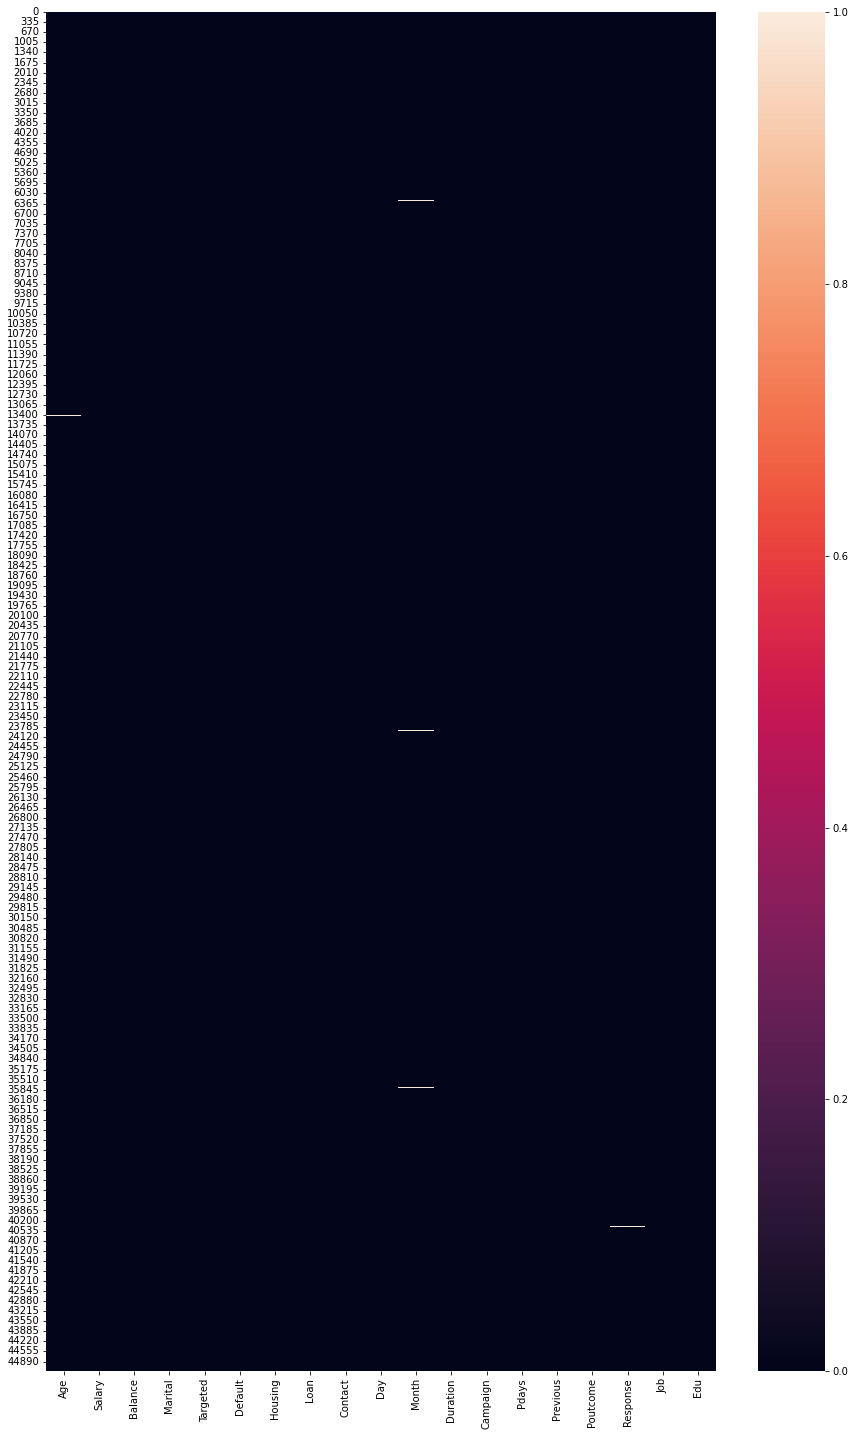

In [575]:
plt.figure(figsize=(15,25))
sns.heatmap(bank_mkt_df.isnull())

#### ***Count of NaN Values***

In [576]:
bank_mkt_df.isnull().sum()

Age         20
Salary       0
Balance      0
Marital      0
Targeted     0
Default      0
Housing      0
Loan         0
Contact      0
Day          0
Month       50
Duration     0
Campaign     0
Pdays        0
Previous     0
Poutcome     0
Response    30
Job          0
Edu          0
dtype: int64

#### ***Percentage of NaN Values***

In [577]:
bank_mkt_df.isnull().sum()/bank_mkt_df.shape[0]*100

Age         0.044237
Salary      0.000000
Balance     0.000000
Marital     0.000000
Targeted    0.000000
Default     0.000000
Housing     0.000000
Loan        0.000000
Contact     0.000000
Day         0.000000
Month       0.110593
Duration    0.000000
Campaign    0.000000
Pdays       0.000000
Previous    0.000000
Poutcome    0.000000
Response    0.066356
Job         0.000000
Edu         0.000000
dtype: float64

#### ***Handling Missing Values***

In [578]:
# Age Colum Missing Value count 

print("Total Missing Value in Age Column is : ",bank_mkt_df.Age.isnull().sum())

Total Missing Value in Age Column is :  20


In [579]:
# Age Colum Missing Value percentage

float(100.0*bank_mkt_df.Age.isnull().sum()/bank_mkt_df.shape[0])

0.04423702196368141

#### ***Drop Rcord of Age Missing Values***

In [580]:
# here we have ignored missing vlaues for age column
bank_mkt_df1 = bank_mkt_df[~bank_mkt_df.Age.isnull()].copy()
bank_mkt_df1.shape

(45191, 19)

In [581]:
# Now Check Age Missing Values count

print("Now age missing vlaue is :",bank_mkt_df1.Age.isnull().sum())

Now age missing vlaue is : 0


#### ***Handle Missing Values for Month Column***

In [582]:
print("Month Missing Value is : ",bank_mkt_df1.Month.isnull().sum())

Month Missing Value is :  50


In [583]:
# Percentage of Month Missing Values

float(100.0*bank_mkt_df1.Month.isnull().sum()/bank_mkt_df1.shape[0])

0.11064149941360005

In [584]:
# Analyze Missing value by month
bank_mkt_df1.Month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: Month, dtype: float64

In [585]:
# Use Mode Method for Month of May 2017

month_mode = bank_mkt_df1.Month.mode()[0]
month_mode

'may, 2017'

In [586]:
# Use Fillna Method for Month of May2017
# For May 2017 missing value was 0.304380 , after using mode method it is 0.305149

bank_mkt_df1.Month.fillna(month_mode,inplace=True)
bank_mkt_df1.Month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: Month, dtype: float64

In [587]:
print("Missing Values for Month Column is : ",bank_mkt_df1.Month.isnull().sum())

Missing Values for Month Column is :  0


#### ***Describe Pdays Variable***
    - We Need to ignore Missing Values in the Calculations
    - In Pdays Column we have -1 value which is not Nan
    - Repalce -1 with NaN 

In [588]:
bank_mkt_df1.Pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: Pdays, dtype: float64

In [589]:
# Replace -1 With NaN

bank_mkt_df1.loc[bank_mkt_df1.Pdays <0, "Pdays"] = np.NaN
bank_mkt_df1.Pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: Pdays, dtype: float64

#### ***Outlier handling Process***

    - Imputation,
    - Deletion of outliers,
    - Binning of values and
    - Capping the outliers.

#### ***Age Variable Outlier***

In [590]:
bank_mkt_df1.Age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: Age, dtype: float64

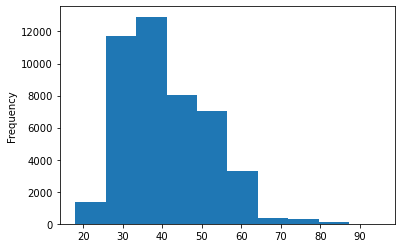

In [591]:
# Visualize Age column by HIstogram

bank_mkt_df1.Age.plot.hist()
plt.show()

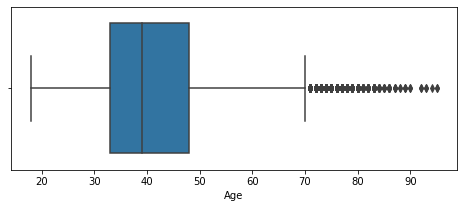

In [592]:
# Visualize Age Varibale value for finding outlier

"""plt.boxplot(bank_mkt_df1['Age'],vert=True)
plt.show()"""

plt.figure(figsize=(8,3))
sns.boxplot(x = bank_mkt_df['Age'])
plt.show()

#### ***Salary Variable Outlier***

In [593]:
# Check Outlier by boxplot  for Salary Variable

bank_mkt_df1.Salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: Salary, dtype: float64

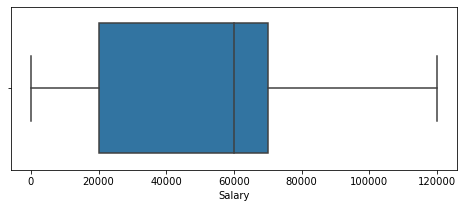

In [594]:
# Visualize salary Varibale value for finding outlier

plt.figure(figsize=(8,3))
sns.boxplot(x = bank_mkt_df1['Salary'])
plt.show()

#### ***Balance Variable Outlier***

In [595]:
bank_mkt_df1.Balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: Balance, dtype: float64

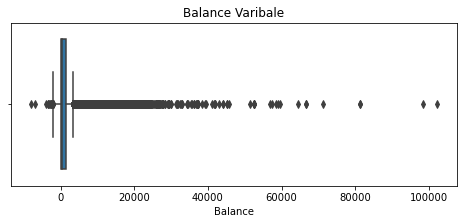

In [596]:
# Visualize Balance Varibale value for finding outlier
plt.figure(figsize=(8,3))
sns.boxplot(bank_mkt_df1.Balance)
plt.title('Balance Varibale')
plt.show()

In [597]:
bank_mkt_df1.Balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: Balance, dtype: float64

In [598]:
bank_mkt_df1[bank_mkt_df1.Balance>15000].describe()

,Age,Salary,Balance,Day,Campaign,Pdays,Previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


Instead of looking at mean, we could look at quantiles/mediands/percentiles instead

#### ***Standardize Variable***
    -Duration Variable

In [599]:
bank_mkt_df1.Duration.head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: Duration, dtype: object

In [600]:
# Describe Durabtion Variable

bank_mkt_df1.Duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: Duration, dtype: object

In [601]:
# Convert into minutes

bank_mkt_df1.Duration = bank_mkt_df1.Duration.apply(lambda x:  float(x.split()[0])/60  if x.find('sec')>0 else float(x.split()[0]) )
bank_mkt_df1.Duration.head()

0    4.350000
1    2.516667
2    1.266667
3    1.533333
4    3.300000
Name: Duration, dtype: float64

In [602]:
bank_mkt_df1.Duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: Duration, dtype: float64

#### ***Find Datatypes***

In [603]:
bank_mkt_df1.dtypes

Age         float64
Salary        int64
Balance       int64
Marital      object
Targeted     object
Default      object
Housing      object
Loan         object
Contact      object
Day           int64
Month        object
Duration    float64
Campaign      int64
Pdays       float64
Previous      int64
Poutcome     object
Response     object
Job          object
Edu          object
dtype: object

#### ***Univariate analysis***
    - Univariate analysis involves the analysis of a single variable at a time. The concept of univariate analysis is divided into the ordered and unordered categories of variables.
    
    - Marital

In [604]:
# Marital value by count 
bank_mkt_df1.Marital.value_counts()

married     27204
single      12786
divorced     5201
Name: Marital, dtype: int64

In [605]:
# Marital value by percentage

bank_mkt_df1.Marital.value_counts(normalize=True)

married     0.601978
single      0.282932
divorced    0.115089
Name: Marital, dtype: float64

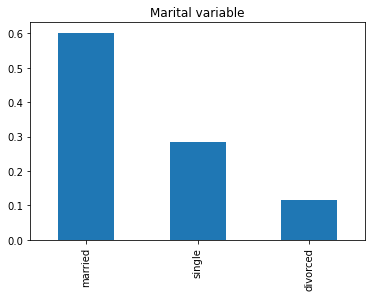

In [606]:
# Visualize Marital variable
bank_mkt_df1.Marital.value_counts(normalize= True,).plot.bar()
plt.title('Marital variable')
plt.show()

    - Job Variable

In [607]:
# Count of Job variable
bank_mkt_df1.Job.value_counts()

blue-collar      9727
management       9455
technician       7594
admin.           5170
services         4152
retired          2263
self-employed    1578
entrepreneur     1485
unemployed       1302
housemaid        1239
student           938
unknown           288
Name: Job, dtype: int64

In [608]:
# percentage of Job variable
round(bank_mkt_df1.Job.value_counts(normalize=True),2)

blue-collar      0.22
management       0.21
technician       0.17
admin.           0.11
services         0.09
retired          0.05
self-employed    0.03
entrepreneur     0.03
unemployed       0.03
housemaid        0.03
student          0.02
unknown          0.01
Name: Job, dtype: float64

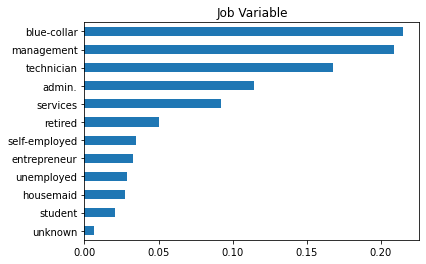

In [609]:
# Visualizez Job variable
bank_mkt_df1.Job.value_counts(normalize=True,ascending=True).plot.barh()
plt.title("Job Variable")
plt.show()

    - Education Variable

In [610]:
# Count of Education Variable 

bank_mkt_df1.Edu.value_counts()

secondary    23193
tertiary     13295
primary       6846
unknown       1857
Name: Edu, dtype: int64

In [611]:
# Percentage of Edu Variable

bank_mkt_df1.Edu.value_counts(normalize = True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: Edu, dtype: float64

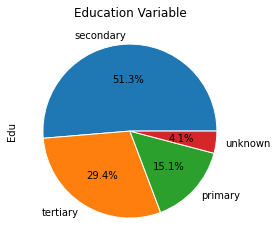

In [612]:
# Visualize Edu Variable

bank_mkt_df1.Edu.value_counts(normalize = True).plot.pie(autopct='%.1f%%',wedgeprops = {'linewidth' : 1.0,'edgecolor':'w'})
plt.title("Education Variable")
plt.show()

    - Poutcome Variable

In [613]:
# count of  Poutcome Variable

bank_mkt_df1.Poutcome.value_counts()

unknown    36944
failure     4898
other       1840
success     1509
Name: Poutcome, dtype: int64

In [614]:
# Percentage of  Poutcome Variable

bank_mkt_df1.Poutcome.value_counts(normalize = True)

unknown    0.817508
failure    0.108384
other      0.040716
success    0.033392
Name: Poutcome, dtype: float64

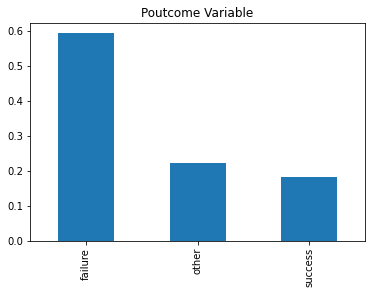

In [615]:
# Visualize Poutcome Variable without unknown variable

bank_mkt_df1[~(bank_mkt_df1.Poutcome=='unknown')] . Poutcome.value_counts(normalize=True).plot.bar()
plt.title('Poutcome Variable')
plt.show()

    - Response Variable

In [616]:
# Count of Response Variable

bank_mkt_df1.Response.value_counts()

no     39876
yes     5285
Name: Response, dtype: int64

In [617]:
# Percentage of Response Variable

bank_mkt_df1.Response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: Response, dtype: float64

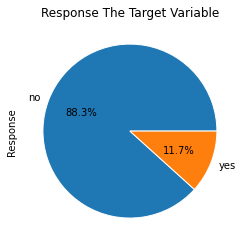

In [618]:
# Visualize of Response Variable

bank_mkt_df1.Response.value_counts().plot.pie(autopct='%.1f%%',wedgeprops = {'linewidth' : 1.0,'edgecolor':'w'})
plt.title('Response The Target Variable')
plt.show()

#### ***Bivariate analysis***
    - Bivariate analysis is slightly more analytical than Univariate analysis. When the data set contains two variables and researchers aim to undertake comparisons between the two data set then Bivariate analysis is the right type of analysis technique.

    - Example : In a survey of a classroom, the researcher may be looking to analysis the ratio of students who scored above 85% corresponding to their genders. In this case, there are two variables – gender = X (independent variable) and result = Y (dependent variable). A Bivariate analysis is will measure the correlations between the two variables.

##### ***Bivariate analysis is conducted using***

    - Correlation coefficients : 
    Correlation coefficients describe the strength and direction of an association between variables

    - Regression analysis : 
    Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables.

    
    Dependent variable is also denoted as “y” variable. Independent variable is denoted as “x” variable. 


Numerical - numerical

In [619]:
# Promt Bnak Marketind Data 

bank_mkt_df1.head()

,Age,Salary,Balance,Marital,Targeted,Default,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Response,Job,Edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown


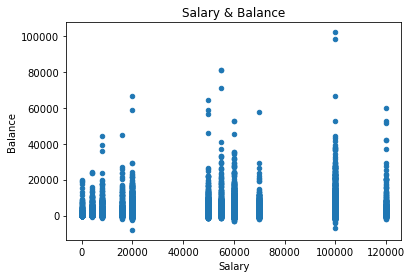

In [620]:
# Visualize Correlation between Salary & Balance
bank_mkt_df1.plot.scatter(x = 'Salary',y = 'Balance')
plt.title('Salary & Balance')
plt.show()

    As we can observe there is not a strong association between Salary Variable and & Balance Variable, in above result

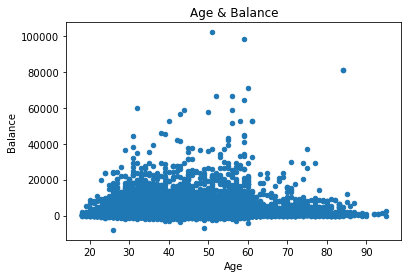

In [621]:
# Visualize Correlation between Age & Balance

bank_mkt_df1.plot.scatter(x = "Age",y = 'Balance')
plt.title('Age & Balance')
plt.show()

    As we can observe there is not a strong association between Age Variable & Balance Variable, in above result

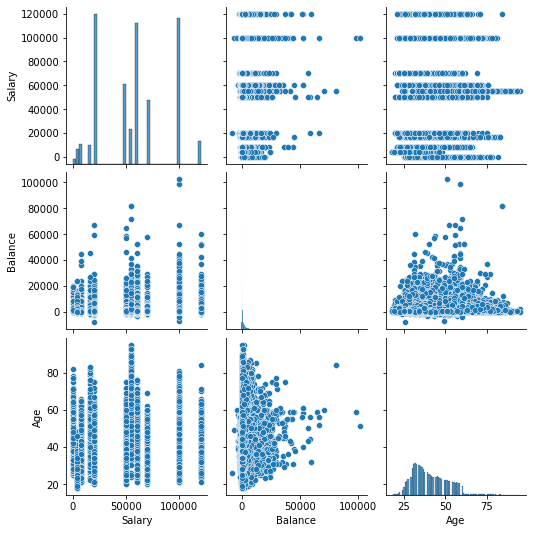

In [622]:
# Visualize Variable  in different Pair

sns.pairplot(data = bank_mkt_df1, vars = ['Salary','Balance','Age']) 
plt.show()

    As we can observe there is not a strong association in above result

#### ***Quantify using correlation values***

In [623]:
bank_mkt_df1[['Age','Salary','Balance']].corr()

,Age,Salary,Balance
Age,1.000000,0.024374,0.097755
Salary,0.024374,1.000000,0.055505
Balance,0.097755,0.055505,1.000000


#### ***Correlation Heatmap***

<AxesSubplot:>

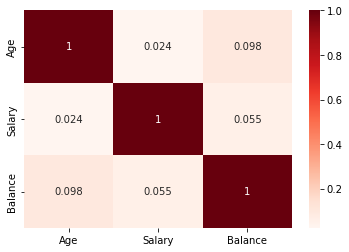

In [624]:
sns.heatmap(bank_mkt_df[['Age', 'Salary', 'Balance']].corr(),annot= True, cmap='Reds')

#### ***Analyse Categorical to Numerical***

In [625]:
bank_mkt_df1.groupby('Response')['Salary'].mean()

Response
no     56769.510482
yes    58780.510880
Name: Salary, dtype: float64

In [626]:
bank_mkt_df1.groupby('Response')['Salary'].median()

Response
no     60000.0
yes    60000.0
Name: Salary, dtype: float64

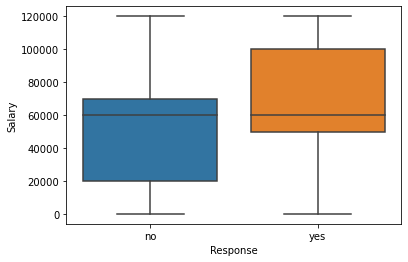

In [627]:
# Visualize Response Variable in box plot for more clearity

sns.boxplot(data = bank_mkt_df1, x = 'Response', y = 'Salary')
plt.show()

    The interquartile range for customers who gave a positive response is on the higher salary side. This is actually true, because people who have higher salaries are more likely to invest in term deposits.

#### ***Response vs Balance***
    - As we can see balance has very high values

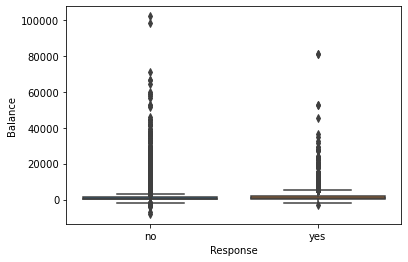

In [628]:
sns.boxplot(data = bank_mkt_df1, x= 'Response', y = 'Balance')
plt.show()

In [629]:
bank_mkt_df1.groupby('Response')['Balance'].mean()

Response
no     1304.292281
yes    1804.681362
Name: Balance, dtype: float64

In [630]:
bank_mkt_df1.groupby('Response')['Balance'].median()

Response
no     417.0
yes    733.0
Name: Balance, dtype: float64

#### ***75th Percentile***

In [631]:
def p75 (x):
    return np.quantile(x, 0.75)

    In such cases, it is a good practice to analyse the data using mean, median or quartiles.

In [632]:
bank_mkt_df1.groupby('Response')['Balance'].aggregate(['mean','median',p75])

,mean,median,p75
Response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


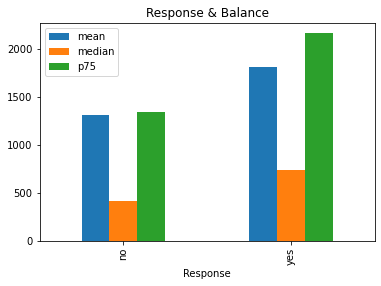

In [633]:
# Visualize mean and median

bank_mkt_df1.groupby('Response')['Balance'].aggregate(['mean','median',p75]).plot.bar()
plt.title('Response & Balance')
plt.show()

In [634]:
bank_mkt_df1.groupby('Edu')['Salary'].mean()

Edu
primary      34224.510663
secondary    49736.127280
tertiary     82878.300113
unknown      46558.427571
Name: Salary, dtype: float64

In [635]:
bank_mkt_df1.groupby('Edu')['Salary'].median()

Edu
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: Salary, dtype: float64

#### ***Analyse Categorical Variable to Categorical Variable***

In [636]:
# Create Flag  for Creating Converting Response value into 0 & 1


bank_mkt_df1['Response_flag'] = np.where(bank_mkt_df1.Response=="yes",1,0)

In [637]:
# cehck Response_flag output
bank_mkt_df1.Response_flag.value_counts()

0    39906
1     5285
Name: Response_flag, dtype: int64

In [638]:
# cehck Response output
bank_mkt_df1.Response.value_counts()

no     39876
yes     5285
Name: Response, dtype: int64

In [639]:
bank_mkt_df1.Response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: Response, dtype: float64

In [640]:
bank_mkt_df1.Response_flag.mean()

0.11694806488017526

#### ***Education vs Response Rate***

In [641]:
bank_mkt_df1.groupby('Edu')['Response_flag'].mean()

Edu
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: Response_flag, dtype: float64

In [642]:
bank_mkt_df1.groupby('Edu')['Response_flag'].median()

Edu
primary      0.0
secondary    0.0
tertiary     0.0
unknown      0.0
Name: Response_flag, dtype: float64

#### ***Marital vs Response Rate***

In [643]:
bank_mkt_df1.groupby('Marital')['Response_flag'].mean()

Marital
divorced    0.119400
married     0.101198
single      0.149460
Name: Response_flag, dtype: float64

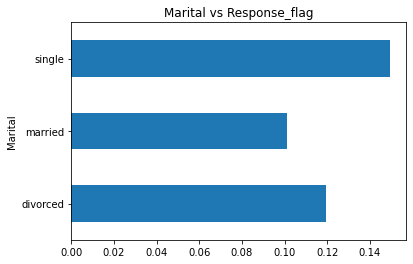

In [644]:
bank_mkt_df1.groupby('Marital')['Response_flag'].mean().plot.barh()
plt.title('Marital vs Response_flag')
plt.show()

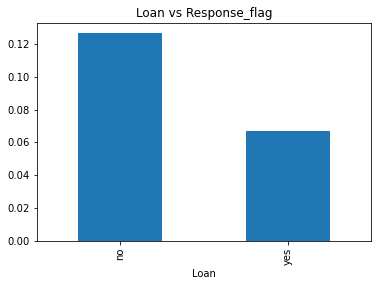

In [645]:
bank_mkt_df1.groupby('Loan')['Response_flag'].mean().plot.bar()
plt.title('Loan vs Response_flag')
plt.show()

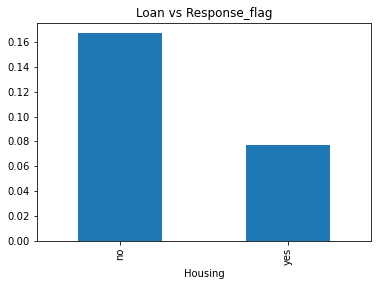

In [646]:
bank_mkt_df1.groupby('Housing')['Response_flag'].mean().plot.bar()
plt.title('Loan vs Response_flag')
plt.show()

#### ***Age vs Response***

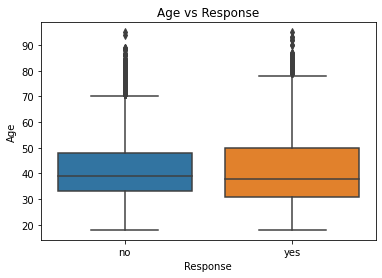

In [647]:

sns.boxplot(data = bank_mkt_df1, x = 'Response',y = 'Age')
plt.title('Age vs Response')
plt.show()

#### ***Create a Bucket From Age Variable***

In [648]:
pd.cut(bank_mkt_df1.Age[:5],[0, 30, 40, 50, 60, 9999], labels=["<30", "30-40", "40-50", "50-60", "60+"])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: Age, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [649]:
# Validate Bucket

bank_mkt_df1.Age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: Age, dtype: float64

In [650]:
bank_mkt_df1['Age_Group'] = pd.cut(bank_mkt_df1.Age, [0, 30, 40, 50, 60, 9999], labels= ["<30", "30-40", "40-50", "5-60", "60+"])

In [652]:
bank_mkt_df1.Age_Group.value_counts(normalize=True)

30-40    0.391206
40-50    0.248611
5-60     0.178376
<30      0.155518
60+      0.026288
Name: Age_Group, dtype: float64

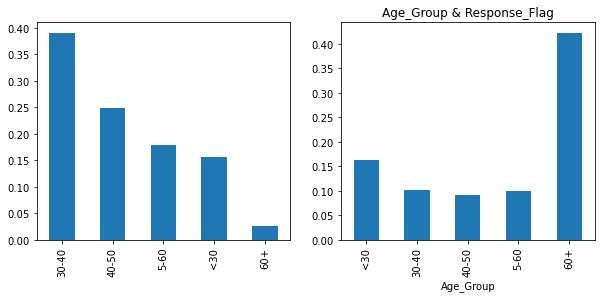

In [663]:
# Visualize Age_Group Variable
# plt.subplot(row,column,position) 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
bank_mkt_df1.Age_Group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
bank_mkt_df1.groupby('Age_Group')['Response_flag'].mean().plot.bar()
plt.title('Age_Group & Response_Flag')
plt.show()

    As we can observe ages more than 60 years have highest response rate

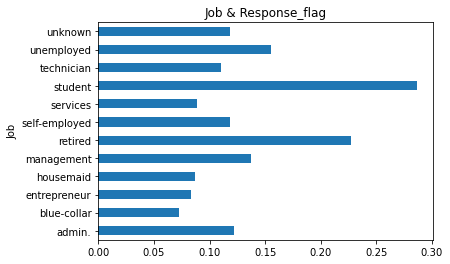

In [667]:
bank_mkt_df1.groupby('Job')['Response_flag'].mean().plot.barh()
plt.title("Job & Response_flag")
plt.show()

#### ***Multivariate Analysis***
    - More Than 2 Variables

In [671]:
res = pd.pivot_table(data = bank_mkt_df1, index = 'Edu', columns='Marital', values= 'Response_flag')
res

Marital,divorced,married,single
Edu,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


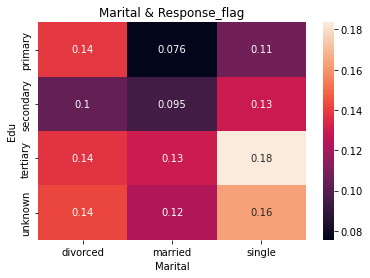

In [675]:
# Visualize Marital & Response_flag variable

sns.heatmap(res,annot = True)
plt.title('Marital & Response_flag')
plt.show()

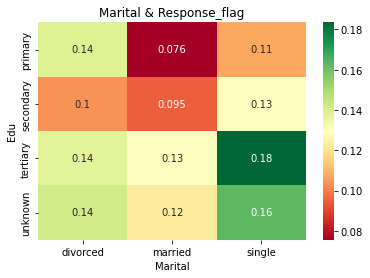

In [682]:
# Visualize Marital & Response_flag variable with color coding

sns.heatmap(res,annot = True,cmap = "RdYlGn")
plt.title('Marital & Response_flag')
plt.show()

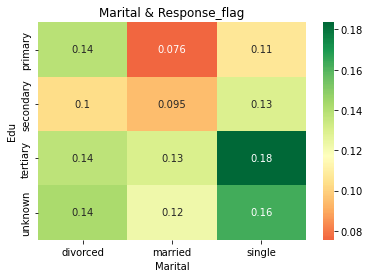

In [683]:
sns.heatmap(res,annot = True,cmap = "RdYlGn", center = 0.117)
plt.title('Marital & Response_flag')
plt.show()

#### ***Job vs. Marital vs. Response***

In [685]:
res1 = pd.pivot_table(data = bank_mkt_df1, index  = 'Job',columns='Marital', values= 'Response_flag')
res1

Marital,divorced,married,single
Job,,,
admin.,0.120000,0.113257,0.136074
blue-collar,0.077540,0.062742,0.105760
entrepreneur,0.083799,0.075843,0.113445
housemaid,0.097826,0.072448,0.166667
management,0.127928,0.126134,0.162254
retired,0.283019,0.220682,0.120370
self-employed,0.158273,0.079557,0.190583
services,0.091241,0.073982,0.117696
student,0.166667,0.185185,0.293850


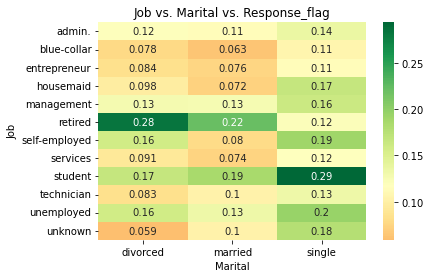

In [691]:
sns.heatmap(res1,annot = True,cmap = "RdYlGn", center = 0.117)
plt.title('Job vs. Marital vs. Response_flag')
plt.show()

#### ***Education vs. Poutcome vs. Response***

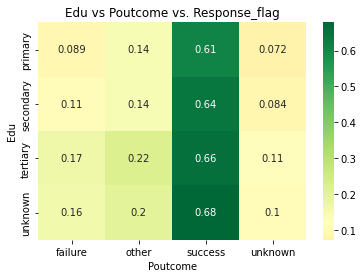

In [692]:
res2 = pd.pivot_table(data = bank_mkt_df1, index = 'Edu', columns='Poutcome', values= 'Response_flag')
sns.heatmap(res2,annot = True, cmap = 'RdYlGn', center = 0.117)
plt.title("Edu vs Poutcome vs. Response_flag")
plt.show()

In [693]:
bank_mkt_df1[bank_mkt_df1.Pdays>0].Response_flag.mean()

0.23061076102762967

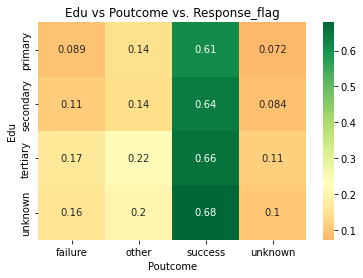

In [696]:
# For this visualization our center point is 0.23

res2 = pd.pivot_table(data = bank_mkt_df1, index = 'Edu', columns='Poutcome', values= 'Response_flag')
sns.heatmap(res2,annot = True, cmap = 'RdYlGn', center = 0.2307)
plt.title("Edu vs Poutcome vs. Response_flag")
plt.show()